In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [9]:
!kaggle datasets download -d salader/dogs-vs-cats

# https://www.kaggle.com/datasets/salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:10<00:00, 267MB/s]
100% 1.06G/1.06G [00:10<00:00, 105MB/s]


In [10]:
import zipfile
zip_ref = zipfile.ZipFile('//content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [17]:
import tensorflow as tf
from keras.layers import  Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from keras.models import Sequential
from tensorflow import keras

In [20]:
from tensorflow import keras

train=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
test=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [76]:
def process(image,label):
  img=tf.cast(image/256,tf.float32)
  return img,label

train=train.map(process)
test=test.map(process)

In [77]:
model=Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(328, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(640, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(640, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 28, 28, 328)    │       378,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 28, 28, 328)    │         1,312 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 14, 14, 328)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 64288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │     8,228,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 640)            │        82,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 640)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 640)            │       410,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 640)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │           641 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,196,073 (35.08 MB)

 Trainable params: 9,194,969 (35.08 MB)

 Non-trainable params: 1,104 (4.31 KB)

In [79]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [80]:
model.fit(train, epochs=10, validation_data=test)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 102ms/step - accuracy: 0.5643 - loss: 1.1110 - val_accuracy: 0.6852 - val_loss: 0.5896
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 102ms/step - accuracy: 0.7159 - loss: 0.5509 - val_accuracy: 0.7042 - val_loss: 0.5577
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 102ms/step - accuracy: 0.7883 - loss: 0.4619 - val_accuracy: 0.6510 - val_loss: 0.5934
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 103ms/step - accuracy: 0.8353 - loss: 0.3681 - val_accuracy: 0.6048 - val_loss: 1.4889
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 98ms/step - accuracy: 0.8842 - loss: 0.2757 - val_accuracy: 0.7728 - val_loss: 0.4433
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.9186 - loss: 0.1972 - val_accuracy: 0.8288 - val_loss: 0.3888
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 96ms/step - accuracy: 0.9444 - loss: 0.1394 - val_accuracy: 0.8794 - val_loss: 0.3517
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 102ms/step - accuracy: 0.9624 - loss: 0.09

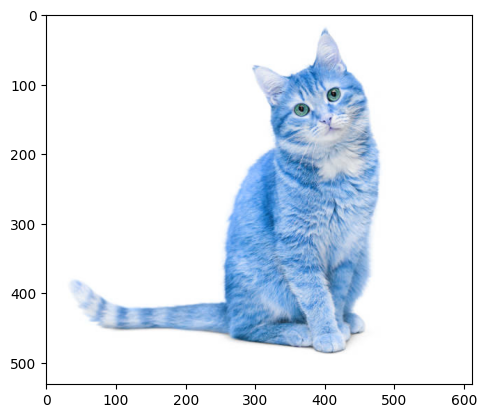

In [81]:
import cv2
import matplotlib.pyplot as plt
test_img=cv2.imread("/content/cat.jpg")
plt.imshow(test_img)
plt.show()

In [83]:
test_img.shape

(531, 612, 3)

In [84]:
new_img=cv2.resize(test_img,(256,256))

In [85]:
new_test=new_img.reshape(1,256,256,3)

In [86]:
model.predict(new_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.]], dtype=float32)

In [90]:
dog=cv2.imread("/content/dog.jpg")

In [91]:
dog_new=cv2.resize(dog,(256,256))

In [99]:
dog.shape

(430, 710, 3)

In [100]:
new_dog=cv2.resize(dog,(256,256))

In [101]:
dog_test=new_dog.reshape(1,256,256,3)

In [103]:
model.predict(dog_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[1.]], dtype=float32)

In [106]:
import pickle

pickle.dump(model,open("model.pkl","wb"))